In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 기본 테마로 설정
sns.set_theme()

In [2]:
# 데이터 경로
data_path = "data/"

# 데이터 불러오기 -> id는 index로 설정해준다.
train = pd.read_csv(data_path + 'train.csv', index_col='id') # 학습 데이터
test = pd.read_csv(data_path + 'test.csv', index_col='id') # 테스트 데이터
submission = pd.read_csv(data_path + 'sample_submission.csv') # 제출 양식

train.shape, test.shape

((6255, 12), (180, 11))

# 데이터 설명

- train.csv, test.csv : 학습 데이터, 테스트 데이터
    - id : 샘플 아이디
    - Store : 쇼핑몰 지점
    - Date : 주 단위(Weekly) 날짜
    - Temperature : 해당 쇼핑몰 주변 기온
    - Fuel_Price : 해당 쇼핑몰 주변 연료 가격
    - Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보
    - Unemployment : 해당 쇼핑몰 지역의 실업률
    - IsHoliday : 해당 기간의 공휴일 포함 여부
    - **Weekly_Sales : 주간 매출액 (목표 예측값)**
    
- train.csv : 2010-02-05 ~ 2012-09-28 (주간)
- test.csv : 2012-10-05 ~ 2012-10-26 (주간) -> 10월 한달

- sample_submission.csv : 제출 양식
    - id : 샘플 아이디
    - **Weekly_Sales : 주간 매출액 (목표 예측값)**

In [3]:
# 학습 데이터 미리보기
train.head()

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
id,,,,,,,,,,,,
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [4]:
train.tail()

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
id,,,,,,,,,,,,
6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20
6255,45,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,8.684,False,713173.95


In [5]:
# 테스트 데이터 미리보기
test.head()

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
id,,,,,,,,,,,
1,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
2,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
3,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
5,2,05/10/2012,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False


In [6]:
# 제출 양식 미리보기
submission.head()

,id,Weekly_Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


# 피처 해석하기

## 범주형 피처

- 명목형 피처 : Store, IsHoliday
    - 쇼핑몰 지점은 45개가 있음을 알 수 있다.
    - 테스트 데이터의 해당 기간의 공휴일 포함 여부는 없음만 있음을 알 수 있다. 또한, bool값으로 되어 있으니 인코딩이 필요함을 알 수 있다.
- 순서형 피처 : 없음

## 수치형 피처

- 이산형 피처 : 없음
- 연속형 피처 : Date, Temperature, Fuel_Price, Promotion 1~5, Unemployment, **Weekly_Sales**
    - Date가 object 타입으로 되어 있으므로 데이터 타입 변경을 해줘야 함을 알 수 있다.
    - 해당 쇼핑몰의 비식별화된 프로모션 정보는 결측치가 있음을 알 수 있다. 또한, 중복값이 몇 개 있음을 알 수 있다. 다른 쇼핑몰 지점이여도 존재하며, 같은 지점이어도 다른 날짜에 중복 사용을 한 것을 알 수 있다.
    - Weekly_Sale은 정규분포형태가 아니기 때문에 변환하는 것이 더 좋을 것 같음을 알 수 있다.

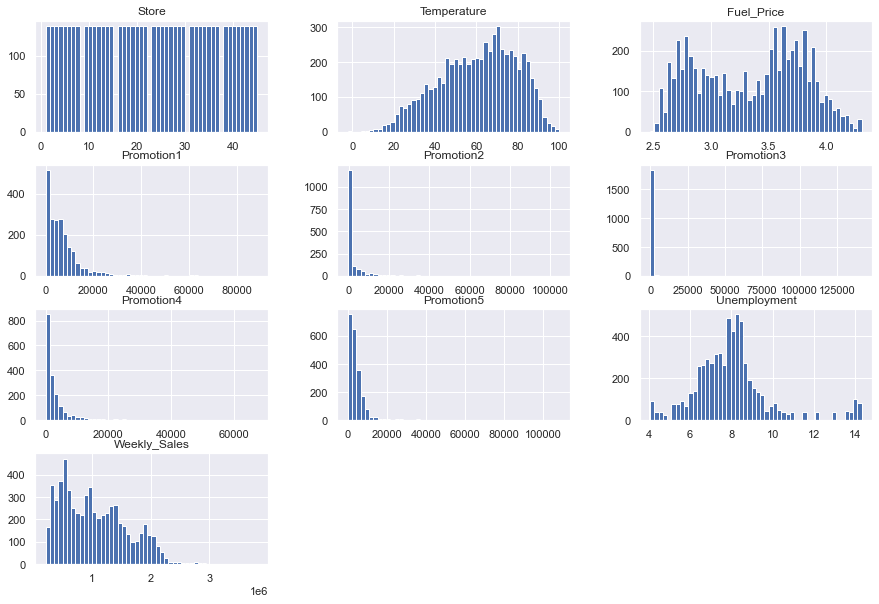

In [7]:
_ = train.hist(bins=50, figsize=(15, 10))

In [8]:
def resumetable(train, test):
    """피처 요약표 만들기"""
    print(f"== 학습 데이터 {train.shape}==")
    train_summary = pd.DataFrame(train.dtypes, columns=['데이터 타입'])\
                        .reset_index().rename(columns={'index' : '피처'})
    train_summary['결측값 개수'] = train.isnull().sum().values
    train_summary['고윳값 개수'] = train.nunique().values
    
    display(train_summary)
    
    print(f"== 테스트 데이터 {test.shape}==")
    test_summary = pd.DataFrame(test.dtypes, columns=['데이터 타입'])\
                        .reset_index().rename(columns={'index' : '피처'})
    test_summary['결측값 개수'] = test.isnull().sum().values
    test_summary['고윳값 개수'] = test.nunique().values
    
    display(test_summary)

In [9]:
resumetable(train, test)

== 학습 데이터 (6255, 12)==


,피처,데이터 타입,결측값 개수,고윳값 개수
0,Store,int64,0,45
1,Date,object,0,139
2,Temperature,float64,0,3470
3,Fuel_Price,float64,0,877
4,Promotion1,float64,4153,2099
5,Promotion2,float64,4663,1457
6,Promotion3,float64,4370,1562
7,Promotion4,float64,4436,1798
8,Promotion5,float64,4140,2114
9,Unemployment,float64,0,321


== 테스트 데이터 (180, 11)==


,피처,데이터 타입,결측값 개수,고윳값 개수
0,Store,int64,0,45
1,Date,object,0,4
2,Temperature,float64,0,136
3,Fuel_Price,float64,0,36
4,Promotion1,float64,2,178
5,Promotion2,float64,135,44
6,Promotion3,float64,19,146
7,Promotion4,float64,34,146
8,Promotion5,float64,0,180
9,Unemployment,float64,0,30


### target 확인

- 정규 분포 형태가 아니어서 로그 변환 해준다.
- standard or robust는 변환되지 않아서 사용하지 않았다.

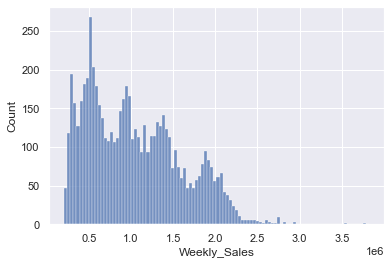

In [10]:
sns.histplot(data=train, x='Weekly_Sales', bins=100)
plt.show()

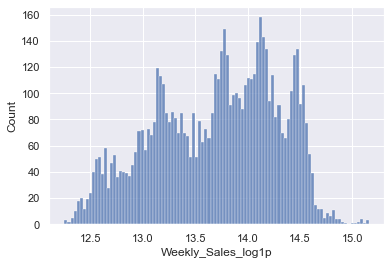

In [11]:
# 로그 변환
train['Weekly_Sales_log1p'] = np.log1p(train['Weekly_Sales'])

sns.histplot(data=train, x='Weekly_Sales_log1p', bins=100)
plt.show()

## 시각화

- year : 점점 감소
- month : 12월이 제일 많고 1월이 제일 적다
- day, week은 주간 매출액이므로 의미 없다고 생각했다.

In [12]:
# date 파생변수 만들기 -> 년, 월
train['Date'] = pd.to_datetime(train['Date'], dayfirst=True)

train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month

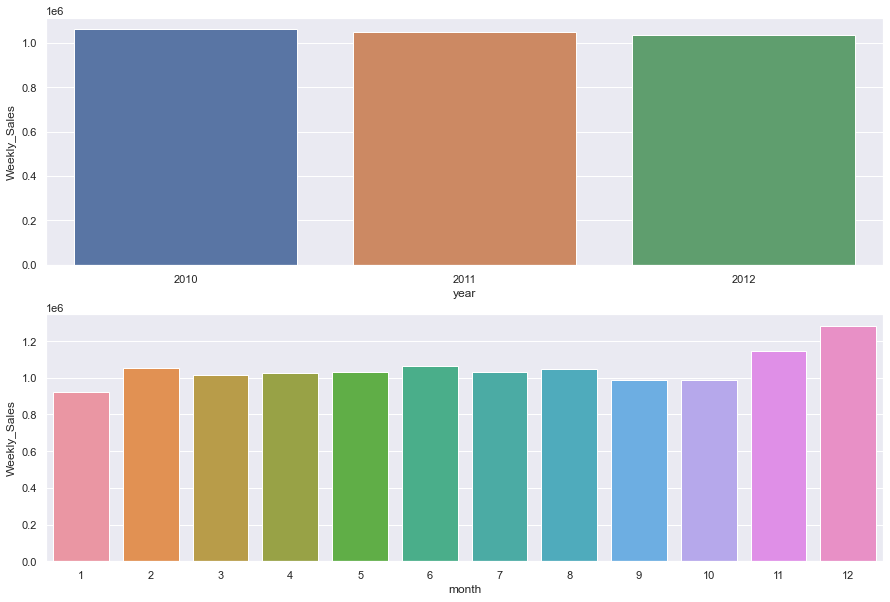

In [13]:
# 연도, 월 평균 주간 매출액
fig, axes = plt.subplots(nrows=2, figsize=(15, 10))

sns.barplot(x='year', y='Weekly_Sales', ci=None, data=train, ax=axes[0])
sns.barplot(x='month', y='Weekly_Sales', ci=None, data=train, ax=axes[1])

plt.show()

- Store마다 이상치가 존재하는 것도 있고 지점별로 격차가 보인다.
- IsHoliday가 아닐 때 이상치가 존재한다.

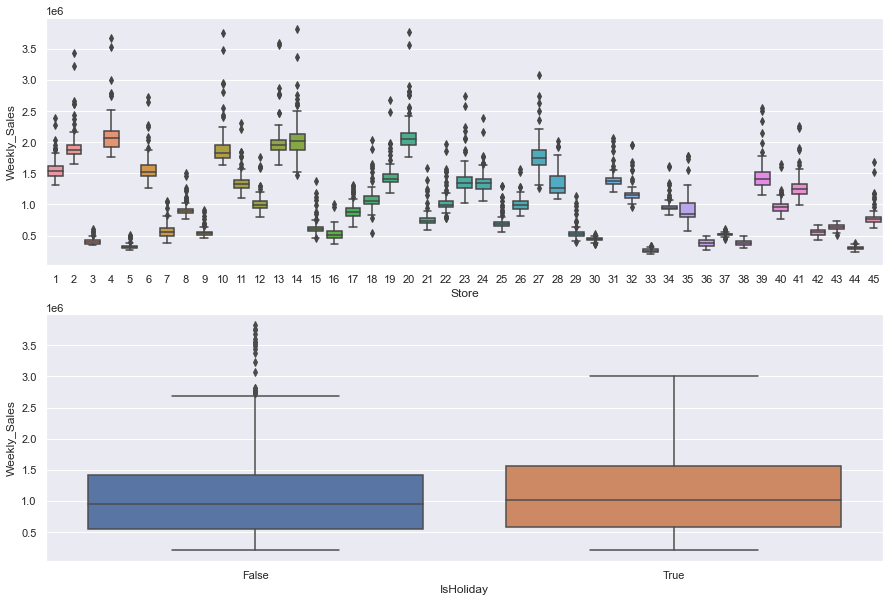

In [14]:
# Store, IsHoliday -> boxplot
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(15, 10)

sns.boxplot(x='Store', y='Weekly_Sales', data=train, ax=axes[0])
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=train, ax=axes[1])

plt.show()

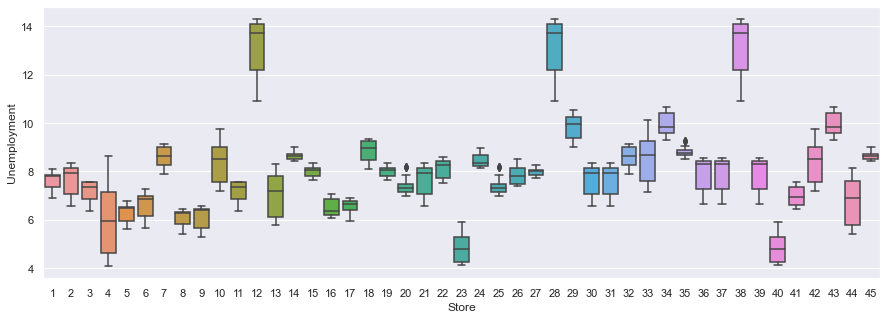

In [15]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Store', y='Unemployment', data=train)
plt.show()

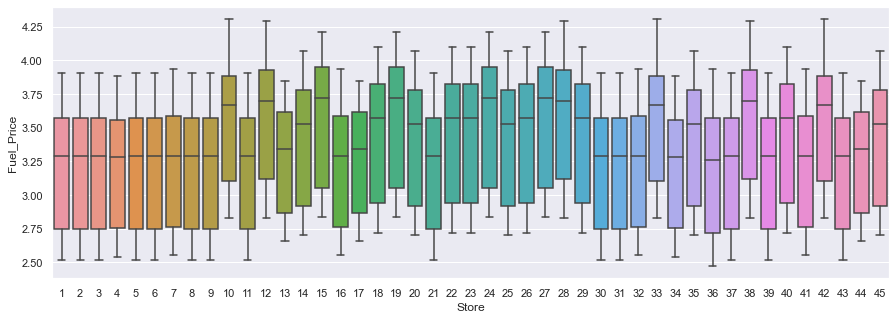

In [16]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Store', y='Fuel_Price', data=train)
plt.show()

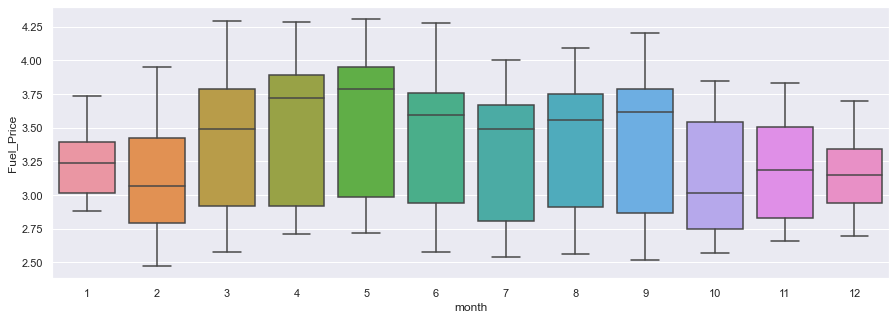

In [17]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='month', y='Fuel_Price', data=train)
plt.show()

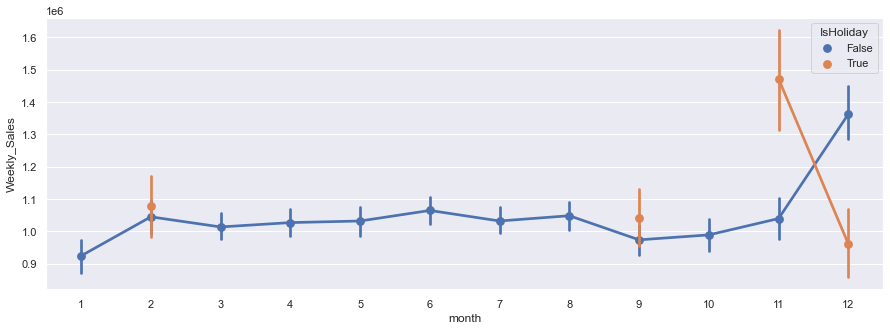

In [18]:
# IsHoliday에 따른 월별 평균 주간 매출액
plt.figure(figsize=(15, 5))

sns.pointplot(x='month', y='Weekly_Sales', hue='IsHoliday', data=train)

plt.show()

- Temperature : 해당 쇼핑몰 주변 온도가 높을수록 살짝 매출액이 감소한다.
- Fuel_price : 해당 쇼핑몰 주변 연료 가격이 높을수록 살짝 매출액이 증가한다. 그러나 거의 연관 없어보인다.
- Promotion 1~5 : 프로모션 식별 값이 높을수록 매출액이 증가한다.
- Unemployment : 해당 쇼핑몰 지역의 실업률이 높을수록 매출액이 감소한다.

In [19]:
promotion_list = ['Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5']

train[promotion_list].describe()

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5
count,2102.000000,1592.000000,1885.000000,1819.000000,2115.000000
mean,7155.930661,3308.125810,1462.535523,3465.952501,4518.993173
std,8408.206085,9382.823804,9667.580258,6413.116294,6048.661908
min,0.270000,-265.760000,-29.100000,0.410000,135.160000
25%,1844.295000,39.755000,4.700000,499.895000,1742.305000
50%,5221.140000,205.410000,24.600000,1532.630000,3226.410000
75%,9199.242500,1931.005000,104.010000,3640.905000,5444.030000
max,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000


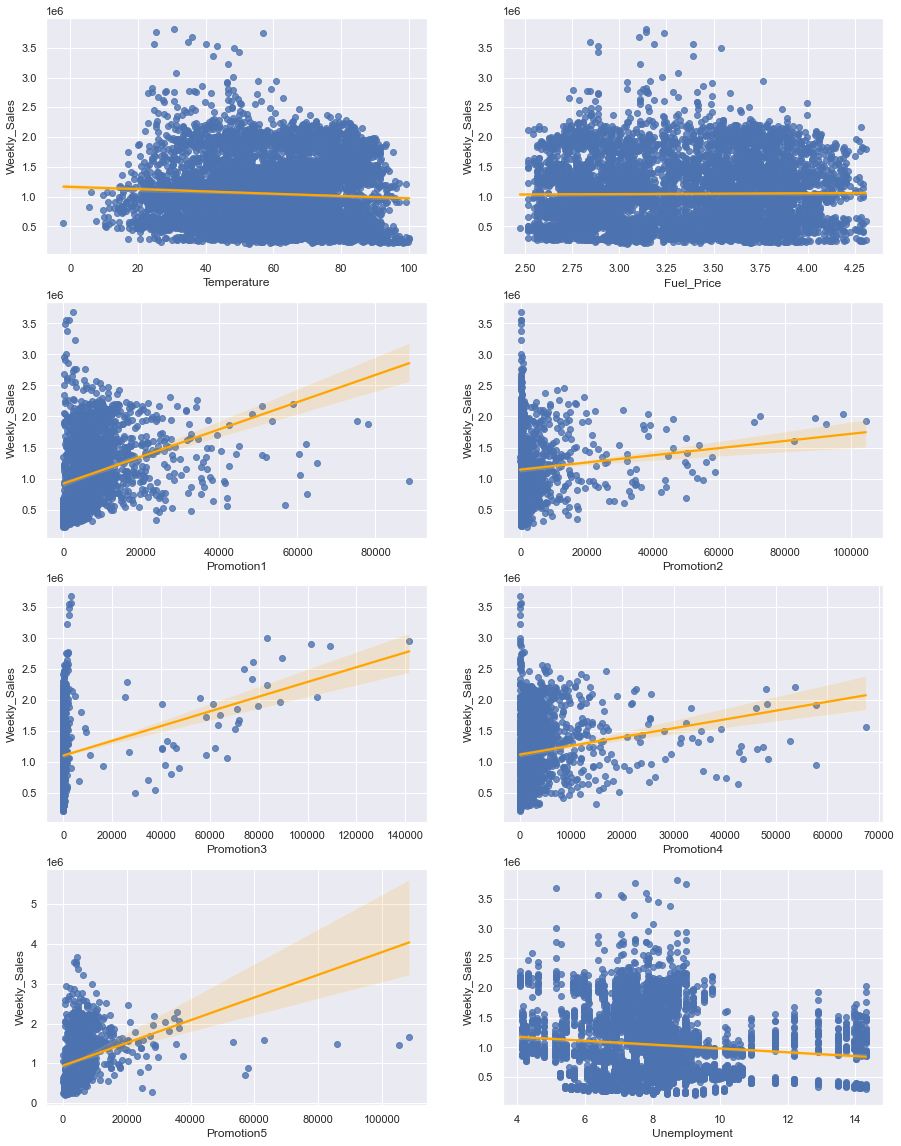

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(15, 20)

sns.regplot(x='Temperature', y='Weekly_Sales', data=train, ax=axes[0, 0], line_kws={'color' : 'orange'})
sns.regplot(x='Fuel_Price', y='Weekly_Sales', data=train, ax=axes[0, 1], line_kws={'color' : 'orange'})
sns.regplot(x='Promotion1', y='Weekly_Sales', data=train, ax=axes[1, 0], line_kws={'color' : 'orange'})
sns.regplot(x='Promotion2', y='Weekly_Sales', data=train, ax=axes[1, 1], line_kws={'color' : 'orange'})
sns.regplot(x='Promotion3', y='Weekly_Sales', data=train, ax=axes[2, 0], line_kws={'color' : 'orange'})
sns.regplot(x='Promotion4', y='Weekly_Sales', data=train, ax=axes[2, 1], line_kws={'color' : 'orange'})
sns.regplot(x='Promotion5', y='Weekly_Sales', data=train, ax=axes[3, 0], line_kws={'color' : 'orange'})
sns.regplot(x='Unemployment', y='Weekly_Sales', data=train, ax=axes[3, 1], line_kws={'color' : 'orange'})

plt.show()

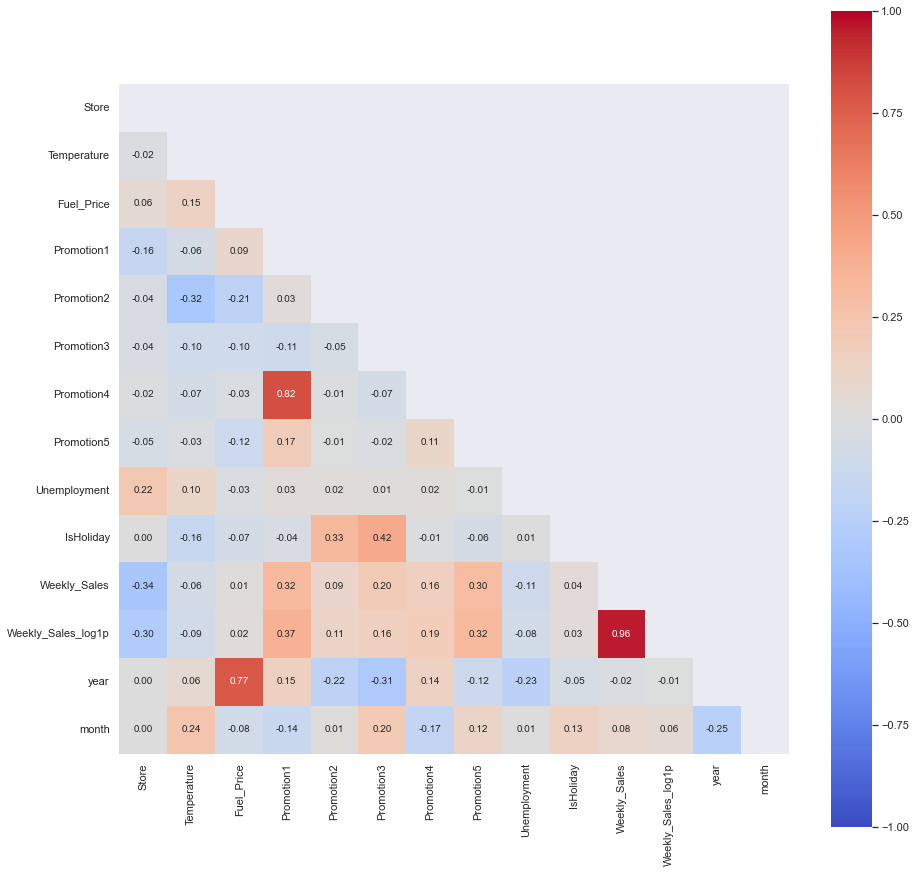

In [21]:
# 상관관계를 확인해보자
plt.figure(figsize=(15, 15))

corr = train.corr()
mask = np.triu(corr)

sns.heatmap(corr, annot=True, fmt='.2f', vmax=1, vmin=-1, cmap='coolwarm', square=True, mask=mask)

plt.show()

# 분석 정리

1. Store : 쇼핑몰 지점
    - 원-핫 인코딩
2. Date : 주 단위(Weekly) 날짜
    - Year, Month 파생 변수 생성
3. Temperature : 해당 쇼핑몰 주변 기온
    - 4 구간으로 구간화
4. Fuel_Price : 해당 쇼핑몰 주변 연료 가격
    - 4 구간으로 구간화
5. Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보
    - 결측치는 -1로 채우고 4 구간으로 구간화
6. Unemployment : 해당 쇼핑몰 지역의 실업률
    - 표준화 또는 정규화
7. IsHoliday : 해당 기간의 공휴일 포함 여부
    - int로 인코딩 후 원-핫 인코딩
8. **Weekly_Sales** : 주간 매출액 (목표 예측값)
    - Log 변환